# MNIST fashion dataset 다중분류

In [1]:
!pip install ipython-autotime
%load_ext autotime

time: 572 µs (started: 2024-07-01 03:18:07 +00:00)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras import layers

SEED=42

time: 10.4 s (started: 2024-07-01 03:18:07 +00:00)


In [3]:
from keras.datasets import fashion_mnist

(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

time: 770 ms (started: 2024-07-01 03:18:17 +00:00)


In [4]:
label_names = ['T-shirt/top', 'Trouser',  'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
label_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

time: 5.7 ms (started: 2024-07-01 03:18:18 +00:00)


## 데이터 확인

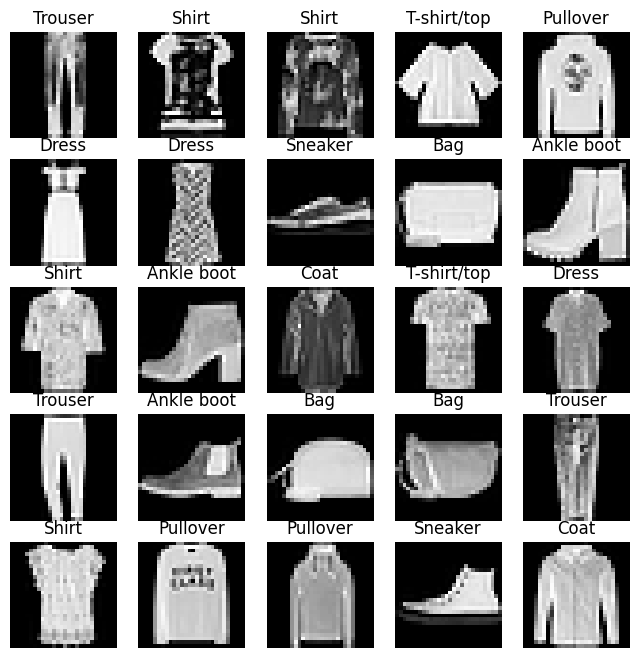

time: 5.85 s (started: 2024-07-01 03:18:18 +00:00)


In [5]:
np.random.seed(SEED)
sample = np.random.randint(60000,size=25)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(sample):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(label_names[y_train[idx]])
    plt.axis('off')

In [6]:
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

time: 22.1 ms (started: 2024-07-01 03:18:24 +00:00)


In [7]:
## 학습용, 검증용 데이터 분리

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=SEED)

time: 1.39 s (started: 2024-07-01 03:18:24 +00:00)


In [8]:
X_train.shape,X_val.shape, y_train.shape,y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

time: 3.77 ms (started: 2024-07-01 03:18:25 +00:00)


## 전처리

In [9]:
# min max scale

X_train_m = X_train/255.0
X_val_m = X_val/255.0
X_test_m = X_test/255.0

time: 438 ms (started: 2024-07-01 03:18:25 +00:00)


In [10]:
X_train_s = X_train_m.reshape(-1,28,28,1)
X_val_s = X_val_m.reshape(-1,28,28,1)
X_test_s = X_test_m.reshape(-1,28,28,1)

X_train_s.shape,X_val_s.shape,X_test_s.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

time: 8.86 ms (started: 2024-07-01 03:18:26 +00:00)


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)
y_train_o = ohe.fit_transform(y_train.reshape(-1,1))
y_val_o = ohe.transform(y_val.reshape(-1,1))
y_test_o = ohe.transform(y_test.reshape(-1,1))

y_train_o.shape,y_test_o.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((48000, 10), (10000, 10))

time: 82.8 ms (started: 2024-07-01 03:18:26 +00:00)


## 모델

In [12]:
model = keras.Sequential([
    layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='valid',input_shape=(28,28,1),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32,kernel_size=3,strides=1,activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(16,activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10,activation='softmax'),
])

time: 368 ms (started: 2024-07-01 03:18:26 +00:00)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 32)          0         
                                                                 
 flatten (Flatten)           (None, 800)               0

In [14]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

time: 75.9 ms (started: 2024-07-01 03:18:26 +00:00)


In [ ]:
history = model.fit(X_train_s,
          y_train_o,
          epochs=4,
          batch_size=128,
          validation_data=(X_val_s,y_val_o))

Epoch 1/10
375/375 [==============================] - 78s 198ms/step - loss: 0.8861 - accuracy: 0.6759 - val_loss: 0.5096 - val_accuracy: 0.8182
Epoch 2/10
375/375 [==============================] - 66s 176ms/step - loss: 0.5439 - accuracy: 0.8060 - val_loss: 0.3958 - val_accuracy: 0.8585
Epoch 3/10
375/375 [==============================] - 66s 176ms/step - loss: 0.4711 - accuracy: 0.8327 - val_loss: 0.3649 - val_accuracy: 0.8688
Epoch 4/10
319/375 [========================>.....] - ETA: 13s - loss: 0.4257 - accuracy: 0.8501

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()
plot